In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
dataset = pd.read_csv("C:\\Users\\Braja\\Desktop\\Data Science\\Projects\\NLP\\Resume Screening with Python\\UpdatedResumeDataSet.csv")

In [3]:
dataset['Cleaned_resume'] = ''

In [4]:
dataset.head()

,Category,Resume,Cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [5]:
dataset['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
dataset['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

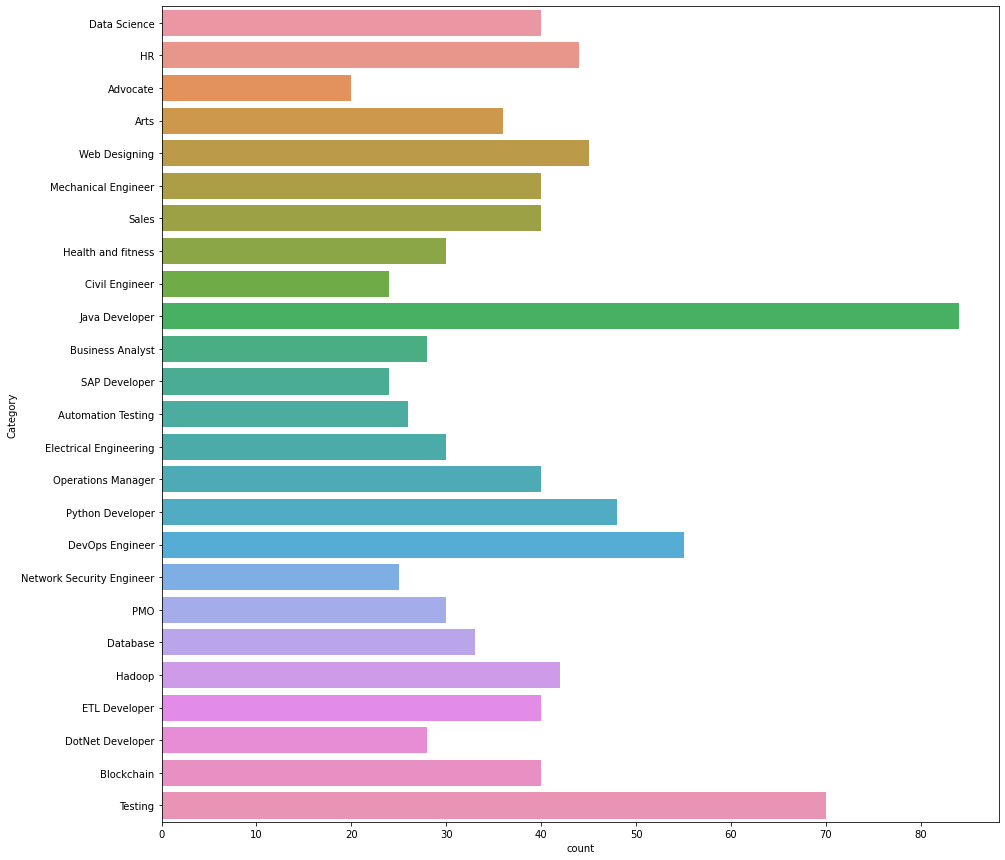

In [7]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.countplot(y='Category', data=dataset)

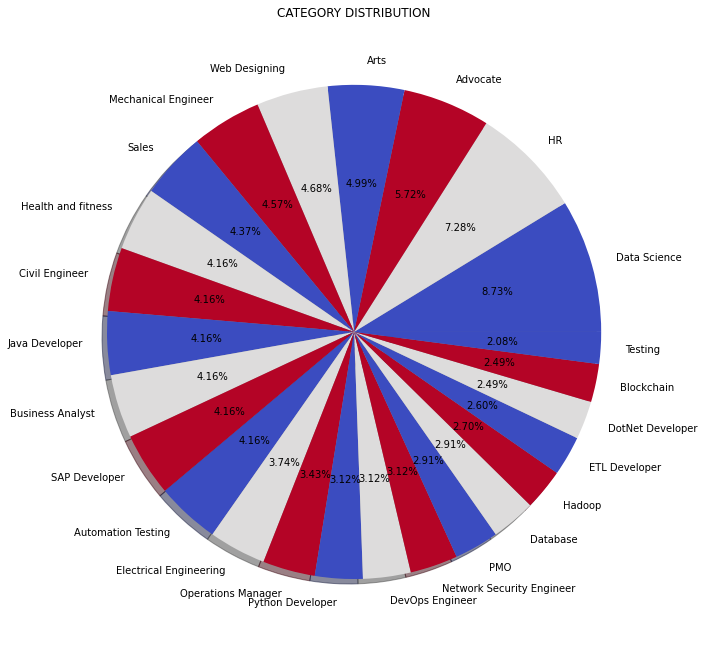

In [8]:
from matplotlib.gridspec import GridSpec
plt.figure(1,figsize=(25,25))
the_grid=GridSpec(2,2)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1], aspect = 1, title = 'CATEGORY DISTRIBUTION')
source_pie = plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].unique(), autopct='%1.2f%%', shadow=True, colors=colors)
plt.show()

In [9]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
dataset['Cleaned_resume'] = dataset.Resume.apply(lambda x: cleanResume(x))

In [10]:
dataset.head()

,Category,Resume,Cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [11]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Braja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Braja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = dataset['Cleaned_resume'].values
cleanedSentences = ""

In [13]:
for i in range(160):
    cleanedSentences += Sentences[i]
    requiredwords = nltk.word_tokenize(Sentences[i])
    for word in requiredwords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

In [14]:
wordfreqdist = nltk.FreqDist(totalWords)
wordfreqdist

FreqDist({'Details': 484, 'Exprience': 446, 'months': 376, 'company': 330, 'description': 310, '1': 290, 'year': 232, 'January': 216, 'Less': 204, 'Data': 200, ...})

In [15]:
mostcommon = wordfreqdist.most_common(50)
mostcommon

[('Details', 484),
 ('Exprience', 446),
 ('months', 376),
 ('company', 330),
 ('description', 310),
 ('1', 290),
 ('year', 232),
 ('January', 216),
 ('Less', 204),
 ('Data', 200),
 ('data', 192),
 ('Skill', 166),
 ('Maharashtra', 166),
 ('6', 164),
 ('Python', 156),
 ('Science', 154),
 ('I', 146),
 ('Education', 142),
 ('College', 140),
 ('The', 126),
 ('project', 126),
 ('like', 126),
 ('Project', 124),
 ('Learning', 116),
 ('India', 114),
 ('Machine', 112),
 ('University', 112),
 ('Web', 106),
 ('using', 104),
 ('monthsCompany', 102),
 ('B', 98),
 ('C', 98),
 ('SQL', 96),
 ('time', 92),
 ('learning', 90),
 ('Mumbai', 90),
 ('Pune', 90),
 ('Arts', 90),
 ('A', 84),
 ('application', 84),
 ('Engineering', 78),
 ('24', 76),
 ('various', 76),
 ('Software', 76),
 ('Responsibilities', 76),
 ('Nagpur', 76),
 ('development', 74),
 ('Management', 74),
 ('projects', 74),
 ('Technologies', 72)]

In [17]:
len(nltk.word_tokenize(cleanedSentences))

43000

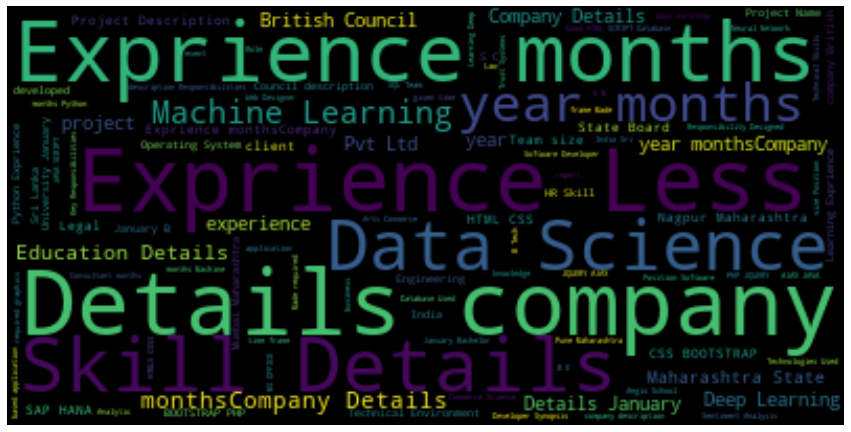

In [88]:
wc= WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [89]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['Category'] = le.fit_transform(dataset['Category'])

In [90]:
dataset.head()

,Category,Resume,Cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = dataset['Cleaned_resume'].values
requiredTarget = dataset['Category'].values

In [95]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                 stop_words='english',
                                 max_features=1500)
word_vectorizer.fit(requiredText)
wordFeatures = word_vectorizer.transform(requiredText)

In [96]:
wordFeatures

<962x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 113017 stored elements in Compressed Sparse Row format>

In [97]:
x_train,x_test,y_train,y_test = train_test_split(wordFeatures,requiredTarget,random_state=0,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(769, 1500) (193, 1500) (769,) (193,)


In [101]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)

prediction = clf.predict(x_test)

In [104]:
print("Accuracy score in traning set {}".format(clf.score(x_train,y_train)))
print("Accuracy score in test set {}".format(clf.score(x_test,y_test)))

Accuracy score in traning set 0.9934980494148244
Accuracy score in test set 0.9896373056994818


In [105]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.